In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans

In [2]:
df_dados = pd.read_csv("Life Expectancy Data.csv")

In [3]:
df_dados

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [4]:
df_dados2012 = df_dados[df_dados["Year"] == 2012]

In [5]:
df_dados2012 = df_dados2012[df_dados2012["Income composition of resources"] > 0]
df_dados2012 = df_dados2012[df_dados2012["Schooling"] > 0]
df_dados2012 = df_dados2012[df_dados2012["infant deaths"] < 900]
df_dados2012 = df_dados2012[df_dados2012["under-five deaths "] < 900]
df_dados2012 = df_dados2012[df_dados2012["GDP"] > 0]

In [6]:
df_alcool = df_dados2012.dropna(subset=["Alcohol"])
df_BMI = df_dados2012.dropna(subset=[" BMI "])

In [7]:
def quantidade_k(df:pd.DataFrame, coluna1, coluna2):
    dists = []
    for i in range(1,10):
        kmeans = KMeans(n_clusters = i)
        kmeans.fit(df[[coluna1, coluna2]])
        dists.append(kmeans.inertia_)
    sns.lineplot(x = range(1,10), y = dists)

In [8]:
def name_countries_classificated(df:pd.DataFrame, label:np.ndarray):

    dfs_ = [
        df.query(f'classificacao == {unique_label}')['Country']\
            .reset_index(drop=True)\
            .rename(f'{unique_label}', axis=0)
        for unique_label in np.unique(label)
    ]

    return pd.concat(dfs_, axis=1)

# Agrupamento entre álcool e expectativa de vida

C:\Users\bergs\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


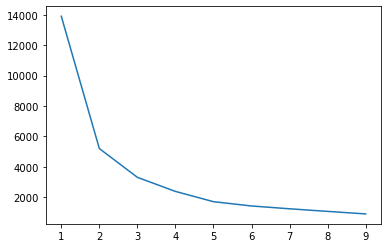

In [9]:
quantidade_k(df_alcool, "Alcohol", "Life expectancy ")

<AxesSubplot:xlabel='Life expectancy ', ylabel='Alcohol'>

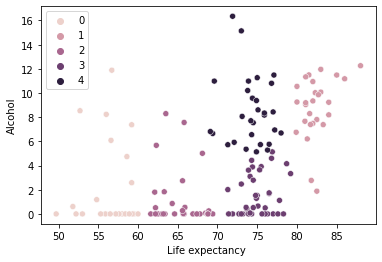

In [10]:
kmeans = KMeans(n_clusters = 5)
kmeans.fit(df_alcool[["Alcohol", "Life expectancy "]])
sns.scatterplot(data = df_alcool, x = "Life expectancy ", y = "Alcohol", hue = kmeans.labels_)

In [11]:
df_ = df_alcool.copy()
df_['classificacao'] = kmeans.labels_
name_countries_classificated(df_, kmeans.labels_)

,0,1,2,3,4
0,Afghanistan,Australia,Bhutan,Albania,Antigua and Barbuda
1,Angola,Austria,Botswana,Algeria,Argentina
2,Benin,Belgium,Cambodia,Armenia,Barbados
3,Burkina Faso,Canada,Comoros,Azerbaijan,Belarus
4,Burundi,Chile,Djibouti,Bahrain,Belize
5,Cameroon,Cyprus,Ethiopia,Bangladesh,Brazil
6,Central African Republic,Denmark,Fiji,Bosnia and Herzegovina,Bulgaria
7,Chad,Finland,Gabon,Brunei Darussalam,China
8,Equatorial Guinea,France,Ghana,Cabo Verde,Croatia
9,Guinea,Germany,Guyana,Colombia,Dominican Republic


Em geral, os países africanos foram colocados no mesmo grupo por causa da sua baixa expectativa de vida, sendo estes muçulmanos ou nao. É válido ressaltar que, por motivos culturais ou religiosos, em países muçulmanos não há consumo de álcool. Os próprios países muçulmanos foram agrupados de forma separada.

Os países com maior expectativa de vida foram todos colocados no mesmo grupo. Não há presença de países com baixíssimo consumo de álcool e, no geral, são países desenvolvidos europeus.

# Agrupamento entre álcool e IDH

C:\Users\bergs\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


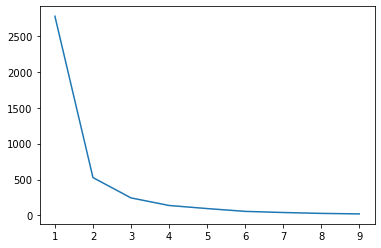

In [12]:
quantidade_k(df_alcool, "Alcohol", "Income composition of resources")

<AxesSubplot:xlabel='Income composition of resources', ylabel='Alcohol'>

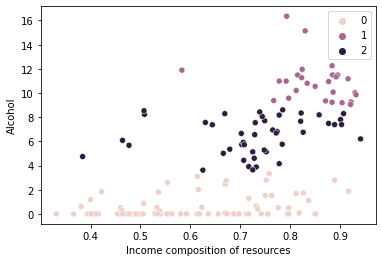

In [13]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(df_alcool[["Alcohol", "Income composition of resources"]])
sns.scatterplot(data = df_alcool, x = "Income composition of resources", y = "Alcohol", hue = kmeans.labels_)

In [14]:
df_ = df_alcool.copy()
df_['classificacao'] = kmeans.labels_
name_countries_classificated(df_, kmeans.labels_)

,0,1,2
0,Afghanistan,Australia,Albania
1,Algeria,Austria,Angola
2,Azerbaijan,Belarus,Antigua and Barbuda
3,Bahrain,Belgium,Argentina
4,Bangladesh,Bulgaria,Armenia
...,...,...,...
75,Uganda,NaN,NaN
76,United Arab Emirates,NaN,NaN
77,Uzbekistan,NaN,NaN
78,Vanuatu,NaN,NaN


Países com um maior consumo de álcool tendem a ter um IDH maior que 0.8. A aparente excessão é a Guiné Equatorial, com 0.591 de IDH

# Agrupamento entre expectativa de vida e IDH

C:\Users\bergs\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


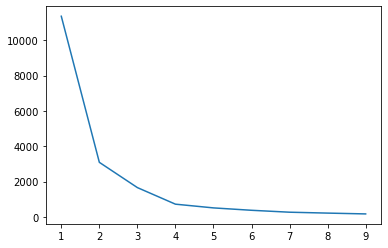

In [15]:
quantidade_k(df_dados2012, "Life expectancy ", "Income composition of resources")

<AxesSubplot:xlabel='Life expectancy ', ylabel='Income composition of resources'>

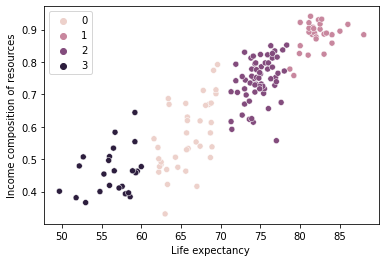

In [16]:
kmeans = KMeans(n_clusters = 4)
kmeans.fit(df_dados2012[["Life expectancy ", "Income composition of resources"]])
sns.scatterplot(data = df_dados2012, x = "Life expectancy ", y = "Income composition of resources", hue = kmeans.labels_)

In [17]:
df_ = df_dados2012.copy()
df_['classificacao'] = kmeans.labels_
name_countries_classificated(df_, kmeans.labels_)

,0,1,2,3
0,Belize,Australia,Albania,Afghanistan
1,Bhutan,Austria,Algeria,Angola
2,Botswana,Belgium,Antigua and Barbuda,Benin
3,Cambodia,Canada,Argentina,Burkina Faso
4,Comoros,Chile,Armenia,Burundi
...,...,...,...,...
58,NaN,NaN,Turkey,NaN
59,NaN,NaN,Ukraine,NaN
60,NaN,NaN,United Arab Emirates,NaN
61,NaN,NaN,Uruguay,NaN


Cuba possui um IDH de 0.764, mas possui uma elevada expectativa de vida, fazendo parte do grupo de maior expectativa de vida

# Agrupamento entre escolaridade e expectativa de vida

C:\Users\bergs\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


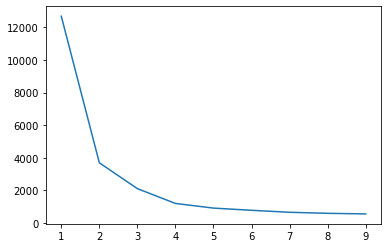

In [18]:
quantidade_k(df_dados2012, "Life expectancy ", "Schooling")

<AxesSubplot:xlabel='Life expectancy ', ylabel='Schooling'>

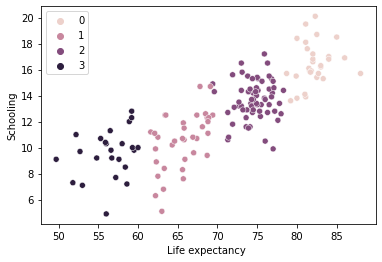

In [19]:
kmeans = KMeans(n_clusters = 4)
kmeans.fit(df_dados2012[["Life expectancy ", "Schooling"]])
sns.scatterplot(data = df_dados2012, x = "Life expectancy ", y = "Schooling", hue = kmeans.labels_)

In [20]:
df_ = df_dados2012.copy()
df_['classificacao'] = kmeans.labels_
name_countries_classificated(df_, kmeans.labels_)

,0,1,2,3
0,Australia,Belize,Albania,Afghanistan
1,Austria,Bhutan,Algeria,Angola
2,Belgium,Botswana,Antigua and Barbuda,Benin
3,Canada,Cambodia,Argentina,Burkina Faso
4,Chile,Comoros,Armenia,Burundi
...,...,...,...,...
60,NaN,NaN,Turkey,NaN
61,NaN,NaN,Ukraine,NaN
62,NaN,NaN,United Arab Emirates,NaN
63,NaN,NaN,Uruguay,NaN


Mesmo possuindo um nível de escolaridade tão baixo quanto os africanos, países membros do grupo 2 geralmente estão localizados na ásia, por causa de uma maior expectativa de vida

# Agrupamento entre escolaridade e IDH

C:\Users\bergs\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


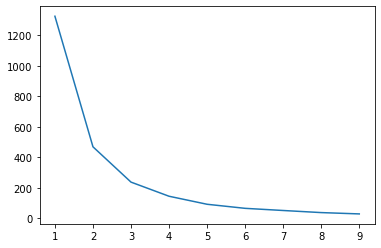

In [21]:
quantidade_k(df_dados2012, "Income composition of resources", "Schooling")

<AxesSubplot:xlabel='Income composition of resources', ylabel='Schooling'>

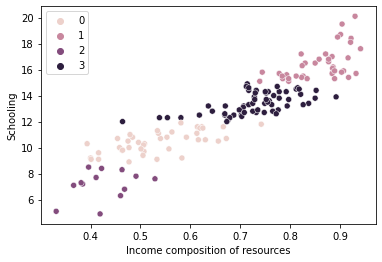

In [22]:
kmeans = KMeans(n_clusters = 4)
kmeans.fit(df_dados2012[["Income composition of resources", "Schooling"]])
sns.scatterplot(data = df_dados2012, x = "Income composition of resources", y = "Schooling", hue = kmeans.labels_)

In [23]:
df_ = df_dados2012.copy()
df_['classificacao'] = kmeans.labels_
name_countries_classificated(df_, kmeans.labels_)

,0,1,2,3
0,Afghanistan,Argentina,Burkina Faso,Albania
1,Angola,Australia,Central African Republic,Algeria
2,Azerbaijan,Austria,Chad,Antigua and Barbuda
3,Bangladesh,Barbados,Djibouti,Armenia
4,Benin,Belarus,Ethiopia,Bahrain
...,...,...,...,...
56,NaN,NaN,NaN,Tunisia
57,NaN,NaN,NaN,Turkey
58,NaN,NaN,NaN,United Arab Emirates
59,NaN,NaN,NaN,Uzbekistan


# Agrupamento entre escolaridade e gastos pessoais com saúde

C:\Users\bergs\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


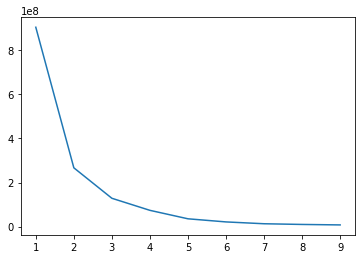

In [24]:
quantidade_k(df_dados2012, "percentage expenditure", "Schooling")

<AxesSubplot:xlabel='percentage expenditure', ylabel='Schooling'>

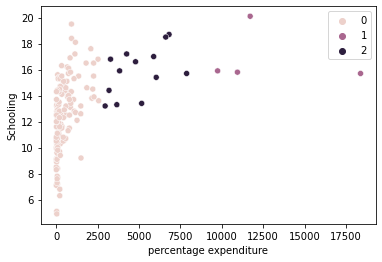

In [25]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(df_dados2012[["percentage expenditure", "Schooling"]])
sns.scatterplot(data = df_dados2012, x = "percentage expenditure", y = "Schooling", hue = kmeans.labels_)

In [26]:
df_ = df_dados2012.copy()
df_['classificacao'] = kmeans.labels_
name_countries_classificated(df_, kmeans.labels_)

,0,1,2
0,Afghanistan,Australia,Austria
1,Albania,Canada,Brunei Darussalam
2,Algeria,Sweden,Finland
3,Angola,Switzerland,Iceland
4,Antigua and Barbuda,NaN,Ireland
...,...,...,...
131,Uruguay,NaN,NaN
132,Uzbekistan,NaN,NaN
133,Vanuatu,NaN,NaN
134,Zambia,NaN,NaN


# Agrupamento entre escolaridade e consumo de álcool

C:\Users\bergs\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


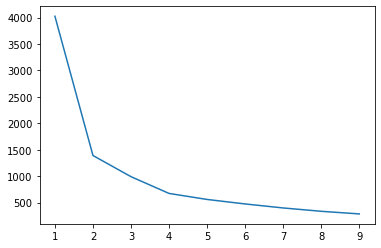

In [27]:
quantidade_k(df_alcool, "Schooling", "Alcohol")

<AxesSubplot:xlabel='Alcohol', ylabel='Schooling'>

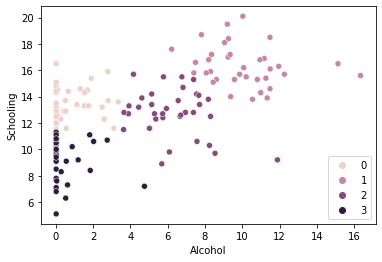

In [28]:
kmeans = KMeans(n_clusters = 4)
kmeans.fit(df_alcool[["Schooling", "Alcohol"]])
sns.scatterplot(data = df_alcool, x = "Alcohol", y = "Schooling", hue = kmeans.labels_)

In [29]:
df_ = df_alcool.copy()
df_['classificacao'] = kmeans.labels_
name_countries_classificated(df_, kmeans.labels_)

,0,1,2,3
0,Algeria,Argentina,Albania,Afghanistan
1,Azerbaijan,Australia,Angola,Bangladesh
2,Bahrain,Austria,Antigua and Barbuda,Benin
3,Bhutan,Barbados,Armenia,Burkina Faso
4,Botswana,Belarus,Belize,Burundi
5,Brunei Darussalam,Belgium,Bosnia and Herzegovina,Cambodia
6,Cabo Verde,Bulgaria,Brazil,Cameroon
7,Costa Rica,Canada,Chile,Central African Republic
8,El Salvador,Croatia,China,Chad
9,Estonia,Cyprus,Colombia,Comoros


# Agrupamento entre massa corporal e mortalidade infantil

C:\Users\bergs\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


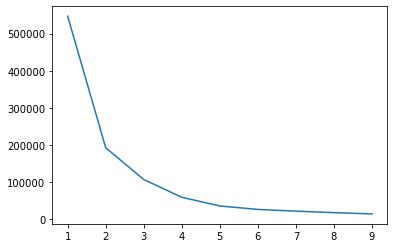

In [30]:
quantidade_k(df_BMI, " BMI ", "infant deaths")

<AxesSubplot:xlabel=' BMI ', ylabel='infant deaths'>

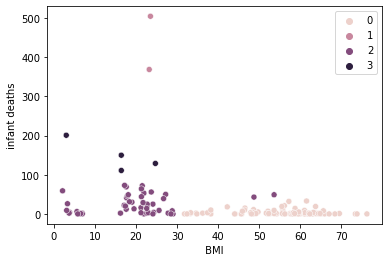

In [31]:
kmeans = KMeans(n_clusters = 4)
kmeans.fit(df_BMI[[" BMI ", "infant deaths"]])
sns.scatterplot(data = df_BMI, x = " BMI ", y = "infant deaths", hue = kmeans.labels_)

In [32]:
df_ = df_BMI.copy()
df_['classificacao'] = kmeans.labels_
name_countries_classificated(df_, kmeans.labels_)

,0,1,2,3
0,Albania,Nigeria,Afghanistan,Bangladesh
1,Algeria,Pakistan,Angola,China
2,Antigua and Barbuda,NaN,Belarus,Ethiopia
3,Argentina,NaN,Benin,Indonesia
4,Armenia,NaN,Bhutan,NaN
...,...,...,...,...
86,Turkmenistan,NaN,NaN,NaN
87,Ukraine,NaN,NaN,NaN
88,United Arab Emirates,NaN,NaN,NaN
89,Uruguay,NaN,NaN,NaN


Os dados da Índia estavam incorretos, apresentando um número de mortalidade infantil muito elevado. Países muito populosos da Ásia se destacam nesse quesito

# Agrupamento entre massa corporal e mortalidade abaixo de 5 anos

C:\Users\bergs\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


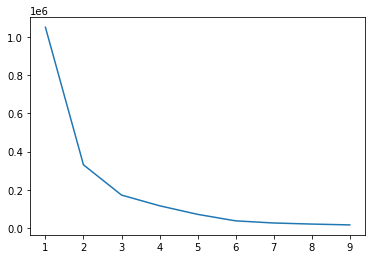

In [33]:
quantidade_k(df_BMI, " BMI ", "under-five deaths ")

<AxesSubplot:xlabel=' BMI ', ylabel='under-five deaths '>

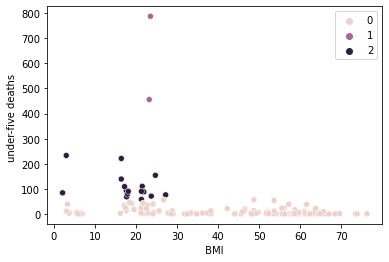

In [34]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(df_BMI[[" BMI ", "under-five deaths "]])
sns.scatterplot(data = df_BMI, x = " BMI ", y = "under-five deaths ", hue = kmeans.labels_)

In [35]:
df_ = df_BMI.copy()
df_['classificacao'] = kmeans.labels_
name_countries_classificated(df_, kmeans.labels_)

,0,1,2
0,Albania,Nigeria,Afghanistan
1,Algeria,Pakistan,Angola
2,Antigua and Barbuda,NaN,Bangladesh
3,Argentina,NaN,Burkina Faso
4,Armenia,NaN,Cameroon
...,...,...,...
128,Uruguay,NaN,NaN
129,Uzbekistan,NaN,NaN
130,Vanuatu,NaN,NaN
131,Zambia,NaN,NaN


# Agrupamento entre gastos governamentais e PIB per capita

C:\Users\bergs\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


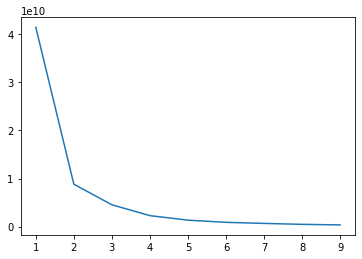

In [36]:
quantidade_k(df_dados2012, "Total expenditure", "GDP")

<AxesSubplot:xlabel='Total expenditure', ylabel='GDP'>

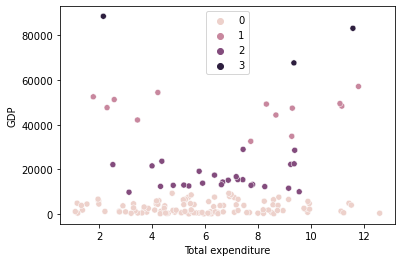

In [37]:
kmeans = KMeans(n_clusters = 4)
kmeans.fit(df_dados2012[["Total expenditure", "GDP"]])
sns.scatterplot(data = df_dados2012, x = "Total expenditure", y = "GDP", hue = kmeans.labels_)

In [38]:
df_ = df_dados2012.copy()
df_['classificacao'] = kmeans.labels_
name_countries_classificated(df_, kmeans.labels_)

,0,1,2,3
0,Afghanistan,Austria,Antigua and Barbuda,Australia
1,Albania,Brunei Darussalam,Argentina,Qatar
2,Algeria,Canada,Bahrain,Switzerland
3,Angola,Finland,Barbados,NaN
4,Armenia,Iceland,Brazil,NaN
...,...,...,...,...
106,Uruguay,NaN,NaN,NaN
107,Uzbekistan,NaN,NaN,NaN
108,Vanuatu,NaN,NaN,NaN
109,Zambia,NaN,NaN,NaN


O PIB per capita de um país não influencia nos gastos governamentais com saúde

# Países com IDH até 0.600

In [39]:
df_0_6 = df_dados2012.copy()
df_0_6 = df_0_6[df_0_6["Income composition of resources"] <= 0.600]

In [40]:
df_alcool06 = df_0_6.dropna(subset = ["Alcohol"])
df_BMI06 = df_0_6.dropna(subset = [" BMI "])

# Álcool e Expectativa de vida

C:\Users\bergs\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


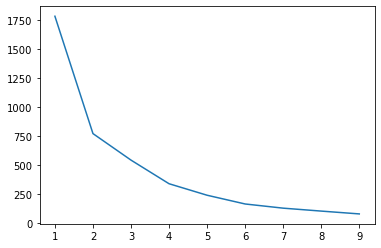

In [41]:
quantidade_k(df_alcool06, "Alcohol", "Life expectancy ")

<AxesSubplot:xlabel='Life expectancy ', ylabel='Alcohol'>

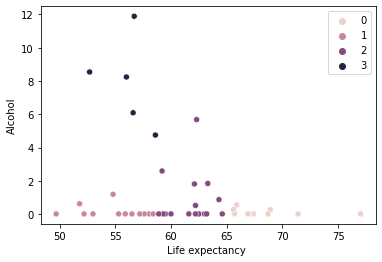

In [42]:
kmeans = KMeans(n_clusters = 4)
kmeans.fit(df_alcool06[["Alcohol", "Life expectancy "]])
sns.scatterplot(data = df_alcool06, x = "Life expectancy ", y = "Alcohol", hue = kmeans.labels_)

In [43]:
df_ = df_alcool06.copy()
df_['classificacao'] = kmeans.labels_
name_countries_classificated(df_, kmeans.labels_)

,0,1,2,3
0,Bangladesh,Burundi,Afghanistan,Angola
1,Bhutan,Cameroon,Benin,Burkina Faso
2,Cambodia,Central African Republic,Comoros,Equatorial Guinea
3,Kiribati,Chad,Djibouti,Nigeria
4,Liberia,Guinea,Ethiopia,Zimbabwe
5,Myanmar,Guinea-Bissau,Ghana,NaN
6,Nepal,Lesotho,Haiti,NaN
7,Pakistan,Malawi,Kenya,NaN
8,Sao Tome and Principe,Mali,Madagascar,NaN
9,Senegal,Mozambique,Mauritania,NaN


Muitos dos países que compõem esse grupo são muçulmanos e, por motivos religiosos, não consomem álcool. Não há uma correlação entre o consumo de álcool e a expectativa de vida.

# Escolaridade e expectativa de vida

C:\Users\bergs\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


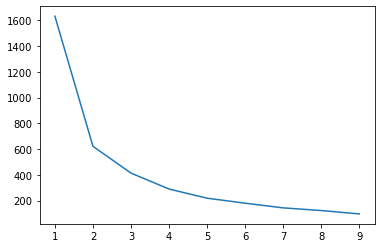

In [44]:
quantidade_k(df_0_6, "Life expectancy ", "Schooling")

<AxesSubplot:xlabel='Life expectancy ', ylabel='Schooling'>

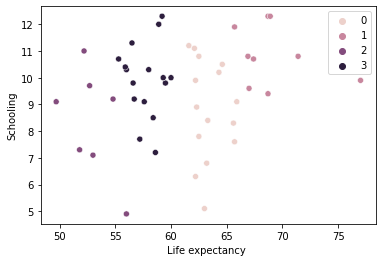

In [45]:
kmeans = KMeans(n_clusters = 4)
kmeans.fit(df_0_6[["Life expectancy ", "Schooling"]])
sns.scatterplot(data = df_0_6, x = "Life expectancy ", y = "Schooling", hue = kmeans.labels_)

In [46]:
df_ = df_0_6.copy()
df_['classificacao'] = kmeans.labels_
name_countries_classificated(df_, kmeans.labels_)

,0,1,2,3
0,Comoros,Bangladesh,Central African Republic,Afghanistan
1,Djibouti,Bhutan,Chad,Angola
2,Ethiopia,Cambodia,Lesotho,Benin
3,Ghana,Kiribati,Mozambique,Burkina Faso
4,Haiti,Liberia,Nigeria,Burundi
5,Kenya,Nepal,Sierra Leone,Cameroon
6,Madagascar,Sao Tome and Principe,South Sudan,Equatorial Guinea
7,Mauritania,Solomon Islands,NaN,Guinea
8,Myanmar,Vanuatu,NaN,Guinea-Bissau
9,Niger,NaN,NaN,Malawi


Não há relação entre a escolaridade e a expectativa de vida. Existem países com alta escolaridade e baixa expectativa de vida, e países com alta escolaridade e alta expectativa de vida.

# Escolaridade e gastos pessoais com saúde

C:\Users\bergs\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


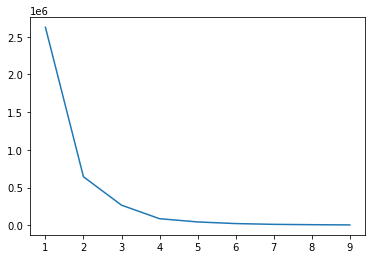

In [96]:
quantidade_k(df_0_6, "percentage expenditure", "Schooling")

<AxesSubplot:xlabel='percentage expenditure', ylabel='Schooling'>

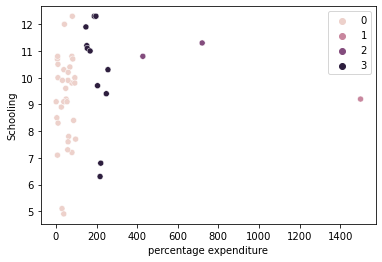

In [97]:
kmeans = KMeans(n_clusters = 4)
kmeans.fit(df_0_6[["percentage expenditure", "Schooling"]])
sns.scatterplot(data = df_0_6, x = "percentage expenditure", y = "Schooling", hue = kmeans.labels_)

In [98]:
df_ = df_0_6.copy()
df_['classificacao'] = kmeans.labels_
name_countries_classificated(df_, kmeans.labels_)

,0,1,2,3
0,Afghanistan,Equatorial Guinea,Swaziland,Angola
1,Bangladesh,NaN,Vanuatu,Bhutan
2,Benin,NaN,NaN,Djibouti
3,Burkina Faso,NaN,NaN,Ghana
4,Burundi,NaN,NaN,Kenya
5,Cambodia,NaN,NaN,Kiribati
6,Cameroon,NaN,NaN,Lesotho
7,Central African Republic,NaN,NaN,Nigeria
8,Chad,NaN,NaN,Solomon Islands
9,Comoros,NaN,NaN,Sudan


Não existe uma correlação significante entre os gastos pessoais com saúde e a escolarização.

# Escolaridade e consumo de álcool

C:\Users\bergs\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


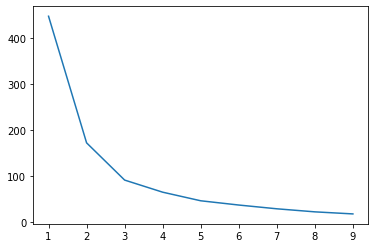

In [50]:
quantidade_k(df_alcool06, "Schooling", "Alcohol")

<AxesSubplot:xlabel='Alcohol', ylabel='Schooling'>

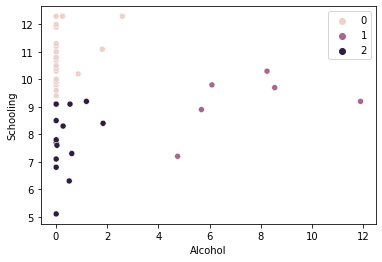

In [51]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(df_alcool06[["Schooling", "Alcohol"]])
sns.scatterplot(data = df_alcool06, x = "Alcohol", y = "Schooling", hue = kmeans.labels_)

In [52]:
df_ = df_alcool06.copy()
df_['classificacao'] = kmeans.labels_
name_countries_classificated(df_, kmeans.labels_)

,0,1,2
0,Afghanistan,Angola,Central African Republic
1,Bangladesh,Burkina Faso,Chad
2,Benin,Equatorial Guinea,Djibouti
3,Bhutan,Haiti,Ethiopia
4,Burundi,Nigeria,Guinea
5,Cambodia,Zimbabwe,Guinea-Bissau
6,Cameroon,NaN,Mali
7,Comoros,NaN,Mauritania
8,Ghana,NaN,Mozambique
9,Kenya,NaN,Myanmar


Pelas questões religiosas já mencionadas, não é possível chegar a uma conclusão válida em um grupo de países como este.

# Massa corporal e mortalidade infantil

C:\Users\bergs\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


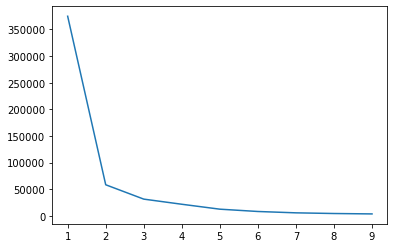

In [53]:
quantidade_k(df_BMI06, " BMI ", "infant deaths")

<AxesSubplot:xlabel=' BMI ', ylabel='infant deaths'>

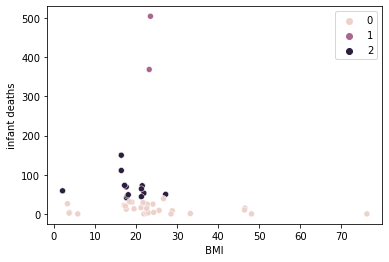

In [54]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(df_BMI06[[" BMI ", "infant deaths"]])
sns.scatterplot(data = df_BMI06, x = " BMI ", y = "infant deaths", hue = kmeans.labels_)

In [55]:
df_ = df_BMI06.copy()
df_['classificacao'] = kmeans.labels_
name_countries_classificated(df_, kmeans.labels_)

,0,1,2
0,Benin,Nigeria,Afghanistan
1,Bhutan,Pakistan,Angola
2,Burundi,NaN,Bangladesh
3,Cambodia,NaN,Burkina Faso
4,Central African Republic,NaN,Cameroon
5,Comoros,NaN,Chad
6,Djibouti,NaN,Ethiopia
7,Equatorial Guinea,NaN,Kenya
8,Ghana,NaN,Mali
9,Guinea,NaN,Mozambique


# Massa corporal e mortalidade abaixo de 5 anos

C:\Users\bergs\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


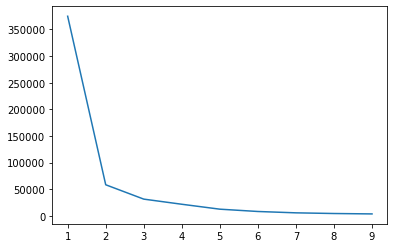

In [56]:
quantidade_k(df_BMI06, " BMI ", "infant deaths")

<AxesSubplot:xlabel=' BMI ', ylabel='under-five deaths '>

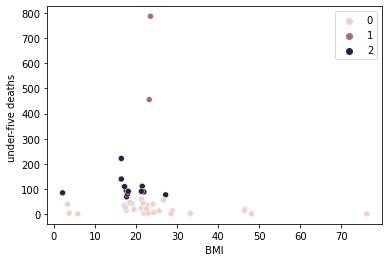

In [57]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(df_BMI06[[" BMI ", "under-five deaths "]])
sns.scatterplot(data = df_BMI06, x = " BMI ", y = "under-five deaths ", hue = kmeans.labels_)

In [58]:
df_ = df_BMI06.copy()
df_['classificacao'] = kmeans.labels_
name_countries_classificated(df_, kmeans.labels_)

,0,1,2
0,Benin,Nigeria,Afghanistan
1,Bhutan,Pakistan,Angola
2,Burundi,NaN,Bangladesh
3,Cambodia,NaN,Burkina Faso
4,Central African Republic,NaN,Cameroon
5,Comoros,NaN,Chad
6,Djibouti,NaN,Ethiopia
7,Equatorial Guinea,NaN,Kenya
8,Ghana,NaN,Mali
9,Guinea,NaN,Mozambique


# Gastos governamentais e PIB per capita

C:\Users\bergs\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


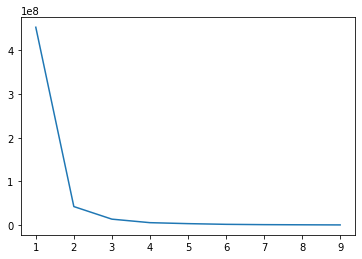

In [59]:
quantidade_k(df_0_6, "Total expenditure", "GDP")

<AxesSubplot:xlabel='Total expenditure', ylabel='GDP'>

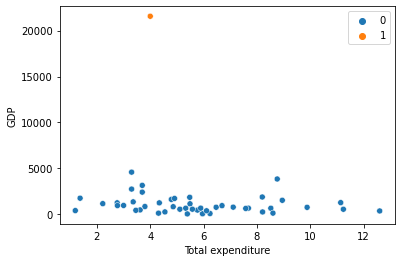

In [60]:
kmeans = KMeans(n_clusters = 2)
kmeans.fit(df_0_6[["Total expenditure", "GDP"]])
sns.scatterplot(data = df_0_6, x = "Total expenditure", y = "GDP", hue = kmeans.labels_)

In [61]:
df_ = df_0_6.copy()
df_['classificacao'] = kmeans.labels_
name_countries_classificated(df_, kmeans.labels_)

,0,1
0,Afghanistan,Equatorial Guinea
1,Angola,NaN
2,Bangladesh,NaN
3,Benin,NaN
4,Bhutan,NaN
5,Burkina Faso,NaN
6,Burundi,NaN
7,Cambodia,NaN
8,Cameroon,NaN
9,Central African Republic,NaN


Mais um exemplo que os gastos governamentais não possuem relação com o PIB per capita de um país.

# Países com IDH entre 0.601 e 0.800

In [62]:
df_6_8 = df_dados2012.copy()
df_6_8 = df_6_8[df_6_8["Income composition of resources"] > 0.600]
df_6_8 = df_6_8[df_6_8["Income composition of resources"] <= 0.800]

In [63]:
df_6_8

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
19,Albania,2012,Developing,76.9,86.0,0,5.14,412.443356,99.0,9,...,99.0,5.59,99.0,0.1,4247.614380,2941.0,1.3,1.4,0.752,14.2
35,Algeria,2012,Developing,75.1,113.0,21,0.66,555.926083,95.0,18,...,95.0,6.14,95.0,0.1,5564.825660,37565847.0,5.9,5.8,0.732,14.4
67,Antigua and Barbuda,2012,Developing,75.9,134.0,0,8.18,2156.229842,98.0,0,...,97.0,5.39,98.0,0.2,12565.441970,NaN,3.3,3.3,0.778,13.8
99,Armenia,2012,Developing,74.4,121.0,1,3.89,274.152699,95.0,0,...,96.0,4.48,95.0,0.1,3684.848100,2881922.0,2.0,2.1,0.732,12.7
147,Azerbaijan,2012,Developing,71.9,123.0,5,0.01,285.610391,88.0,0,...,92.0,5.37,89.0,0.1,7496.335728,9295784.0,2.8,2.8,0.742,11.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2684,Turkey,2012,Developing,74.8,112.0,19,1.54,20.751202,97.0,349,...,97.0,5.24,97.0,0.1,1172.384300,74569867.0,4.9,4.7,0.750,14.3
2700,Turkmenistan,2012,Developing,65.6,22.0,7,2.75,579.412824,98.0,0,...,98.0,1.96,97.0,0.1,6675.262954,5267839.0,3.2,3.3,0.672,10.7
2733,Ukraine,2012,Developing,77.0,25.0,5,8.44,453.783085,46.0,12746,...,72.0,7.47,76.0,0.2,3855.421280,455933.0,2.4,2.4,0.739,15.1
2813,Uruguay,2012,Developing,76.5,118.0,0,5.77,339.719049,95.0,0,...,95.0,8.74,95.0,0.1,1592.681900,3396777.0,1.5,1.5,0.784,15.5


In [64]:
df_alcool68 = df_6_8.dropna(subset = ["Alcohol"])
df_BMI68 = df_6_8.dropna(subset = [" BMI "])

# Álcool e expectativa de vida

C:\Users\bergs\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


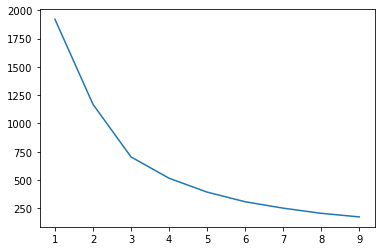

In [65]:
quantidade_k(df_alcool68, "Alcohol", "Life expectancy ")

<AxesSubplot:xlabel='Life expectancy ', ylabel='Alcohol'>

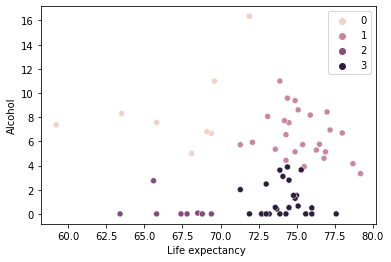

In [66]:
kmeans = KMeans(n_clusters = 4)
kmeans.fit(df_alcool68[["Alcohol", "Life expectancy "]])
sns.scatterplot(data = df_alcool68, x = "Life expectancy ", y = "Alcohol", hue = kmeans.labels_)

In [67]:
df_ = df_alcool68.copy()
df_['classificacao'] = kmeans.labels_
name_countries_classificated(df_, kmeans.labels_)

,0,1,2,3
0,Belarus,Albania,Botswana,Algeria
1,Belize,Antigua and Barbuda,Fiji,Armenia
2,Gabon,Barbados,Indonesia,Azerbaijan
3,Guyana,Bosnia and Herzegovina,Mongolia,Cabo Verde
4,Kazakhstan,Brazil,Namibia,El Salvador
5,Philippines,Bulgaria,Tajikistan,Guatemala
6,Russian Federation,China,Timor-Leste,Honduras
7,South Africa,Colombia,Turkmenistan,Iraq
8,NaN,Costa Rica,Uzbekistan,Jamaica
9,NaN,Cuba,NaN,Jordan


Não existe uma relação entre a expectativa de vida e o consumo de álcool. Mais uma vez, há a presença de países onde não há consumo de álcool por questões religiosas.

# Escolaridade e expectativa de vida

C:\Users\bergs\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


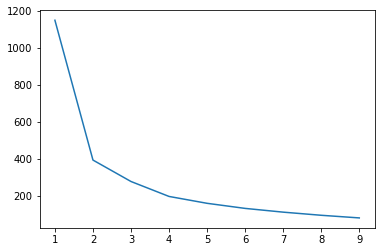

In [101]:
quantidade_k(df_6_8, "Life expectancy ", "Schooling")

<AxesSubplot:xlabel='Life expectancy ', ylabel='Schooling'>

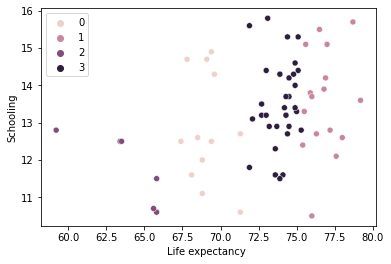

In [102]:
kmeans = KMeans(n_clusters = 4)
kmeans.fit(df_6_8[["Life expectancy ", "Schooling"]])
sns.scatterplot(data = df_6_8, x = "Life expectancy ", y = "Schooling", hue = kmeans.labels_)

In [103]:
df_ = df_6_8.copy()
df_['classificacao'] = kmeans.labels_
name_countries_classificated(df_, kmeans.labels_)

,0,1,2,3
0,Belize,Albania,Botswana,Algeria
1,Fiji,Antigua and Barbuda,Gabon,Armenia
2,Guatemala,Bosnia and Herzegovina,Guyana,Azerbaijan
3,Indonesia,China,Namibia,Barbados
4,Kazakhstan,Costa Rica,South Africa,Belarus
5,Mongolia,Cuba,Turkmenistan,Brazil
6,Philippines,Ecuador,NaN,Bulgaria
7,Russian Federation,Iraq,NaN,Cabo Verde
8,Suriname,Maldives,NaN,Colombia
9,Tajikistan,Mexico,NaN,Dominican Republic


Nesse grupo de países, existe uma correlação fraca entre a escolaridade e a expectativa de vida.

In [108]:
corr_escolaridade_expect68 = df_[["Life expectancy ", "Schooling"]].corr()

In [109]:
corr_escolaridade_expect68

,Life expectancy,Schooling
Life expectancy,1.000000,0.349194
Schooling,0.349194,1.000000


# Escolaridade e gastos pessoais com saúde

C:\Users\bergs\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


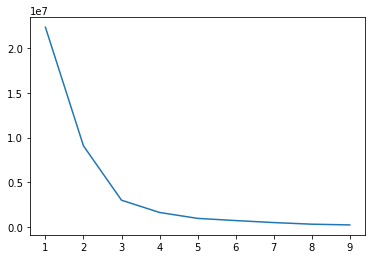

In [71]:
quantidade_k(df_6_8, "percentage expenditure", "Schooling")

<AxesSubplot:xlabel='percentage expenditure', ylabel='Schooling'>

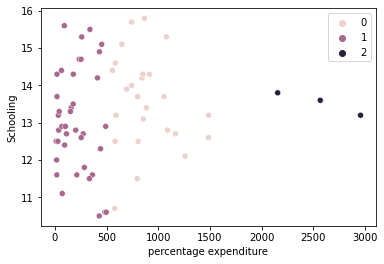

In [72]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(df_6_8[["percentage expenditure", "Schooling"]])
sns.scatterplot(data = df_6_8, x = "percentage expenditure", y = "Schooling", hue = kmeans.labels_)

In [73]:
df_ = df_6_8.copy()
df_['classificacao'] = kmeans.labels_
name_countries_classificated(df_, kmeans.labels_)

,0,1,2
0,Algeria,Albania,Antigua and Barbuda
1,Belize,Armenia,Costa Rica
2,Bosnia and Herzegovina,Azerbaijan,Kuwait
3,Brazil,Barbados,NaN
4,Bulgaria,Belarus,NaN
5,Colombia,Botswana,NaN
6,Cuba,Cabo Verde,NaN
7,Dominican Republic,China,NaN
8,El Salvador,Ecuador,NaN
9,Gabon,Fiji,NaN


Não existe correlação entre escolaridade e gastos pessoais com saúde.

# Escolaridade e consumo de álcool

C:\Users\bergs\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


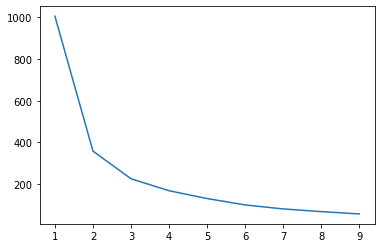

In [74]:
quantidade_k(df_alcool68, "Schooling", "Alcohol")

<AxesSubplot:xlabel='Alcohol', ylabel='Schooling'>

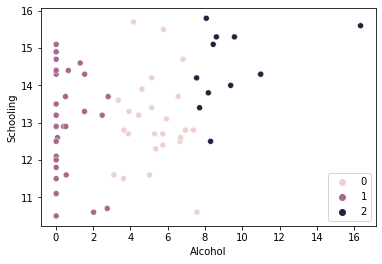

In [75]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(df_alcool68[["Schooling", "Alcohol"]])
sns.scatterplot(data = df_alcool68, x = "Alcohol", y = "Schooling", hue = kmeans.labels_)

In [76]:
df_ = df_alcool68.copy()
df_['classificacao'] = kmeans.labels_
name_countries_classificated(df_, kmeans.labels_)

,0,1,2
0,Albania,Algeria,Antigua and Barbuda
1,Armenia,Azerbaijan,Barbados
2,Belize,Botswana,Belarus
3,Bosnia and Herzegovina,Cabo Verde,Brazil
4,China,El Salvador,Bulgaria
5,Colombia,Fiji,Gabon
6,Costa Rica,Guatemala,Georgia
7,Cuba,Indonesia,Grenada
8,Dominican Republic,Iraq,Romania
9,Ecuador,Jordan,Russian Federation


Existe uma correlação fraca entre a escolaridade e o consumo de álcool.

In [113]:
correl_esc_alcool68 = df_alcool68[["Schooling", "Alcohol"]].corr()

In [114]:
correl_esc_alcool68

,Schooling,Alcohol
Schooling,1.000000,0.335941
Alcohol,0.335941,1.000000


# Massa corporal e mortalidade infantil

C:\Users\bergs\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


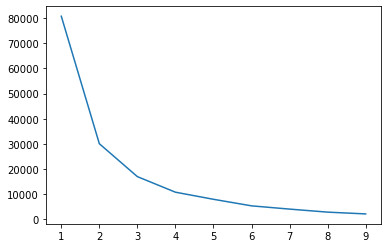

In [77]:
quantidade_k(df_BMI68, " BMI ", "infant deaths")

<AxesSubplot:xlabel=' BMI ', ylabel='infant deaths'>

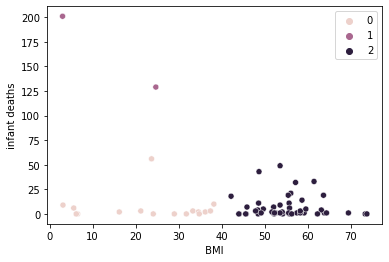

In [78]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(df_BMI68[[" BMI ", "infant deaths"]])
sns.scatterplot(data = df_BMI68, x = " BMI ", y = "infant deaths", hue = kmeans.labels_)

In [79]:
df_ = df_BMI68.copy()
df_['classificacao'] = kmeans.labels_
name_countries_classificated(df_, kmeans.labels_)

,0,1,2
0,Belarus,China,Albania
1,Botswana,Indonesia,Algeria
2,Cabo Verde,NaN,Antigua and Barbuda
3,Fiji,NaN,Armenia
4,Gabon,NaN,Azerbaijan
5,Kazakhstan,NaN,Barbados
6,Malaysia,NaN,Belize
7,Maldives,NaN,Bosnia and Herzegovina
8,Mauritius,NaN,Brazil
9,Montenegro,NaN,Bulgaria


# Massa corporal e mortalidade abaixo de 5 anos

C:\Users\bergs\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


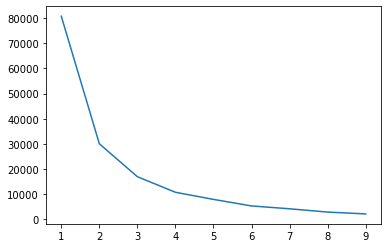

In [80]:
quantidade_k(df_BMI68, " BMI ", "infant deaths")

<AxesSubplot:xlabel=' BMI ', ylabel='infant deaths'>

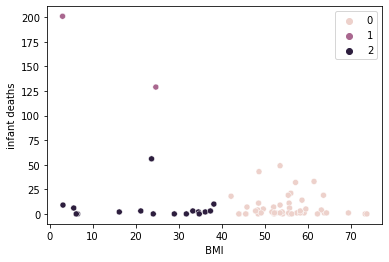

In [81]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(df_BMI68[[" BMI ", "infant deaths"]])
sns.scatterplot(data = df_BMI68, x = " BMI ", y = "infant deaths", hue = kmeans.labels_)

In [82]:
df_ = df_BMI68.copy()
df_['classificacao'] = kmeans.labels_
name_countries_classificated(df_, kmeans.labels_)

,0,1,2
0,Albania,China,Belarus
1,Algeria,Indonesia,Botswana
2,Antigua and Barbuda,NaN,Cabo Verde
3,Armenia,NaN,Fiji
4,Azerbaijan,NaN,Gabon
5,Barbados,NaN,Kazakhstan
6,Belize,NaN,Malaysia
7,Bosnia and Herzegovina,NaN,Maldives
8,Brazil,NaN,Mauritius
9,Bulgaria,NaN,Montenegro


# Países com IDH acima de 0.800

In [83]:
df_8 = df_dados2012.copy()
df_8 = df_8[df_8["Income composition of resources"] > 0.800]

In [84]:
df_alcool8 = df_8.dropna(subset = ["Alcohol"])
df_BMI8 = df_8.dropna(subset = [" BMI "])

# Álcool e Expectativa de vida

C:\Users\bergs\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


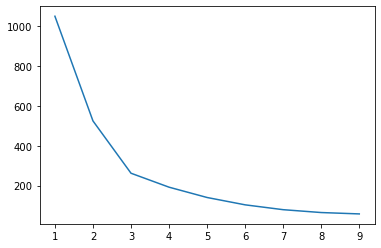

In [115]:
quantidade_k(df_alcool8, "Alcohol", "Life expectancy ")

<AxesSubplot:xlabel='Life expectancy ', ylabel='Alcohol'>

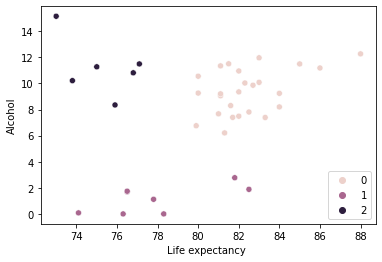

In [116]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(df_alcool8[["Alcohol", "Life expectancy "]])
sns.scatterplot(data = df_alcool8, x = "Life expectancy ", y = "Alcohol", hue = kmeans.labels_)

In [117]:
df_ = df_alcool8.copy()
df_['classificacao'] = kmeans.labels_
name_countries_classificated(df_, kmeans.labels_)

,0,1,2
0,Australia,Bahrain,Argentina
1,Austria,Brunei Darussalam,Croatia
2,Belgium,Estonia,Hungary
3,Canada,Israel,Latvia
4,Chile,Qatar,Lithuania
5,Cyprus,Saudi Arabia,Poland
6,Denmark,Singapore,NaN
7,Finland,United Arab Emirates,NaN
8,France,NaN,NaN
9,Germany,NaN,NaN


Não há correlação entre consumo de álcool e expectativa de vida.

# Escolaridade e expectativa de vida

C:\Users\bergs\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


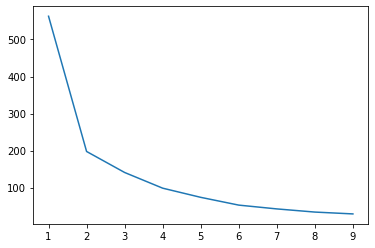

In [87]:
quantidade_k(df_8, "Life expectancy ", "Schooling")

<AxesSubplot:xlabel='Life expectancy ', ylabel='Schooling'>

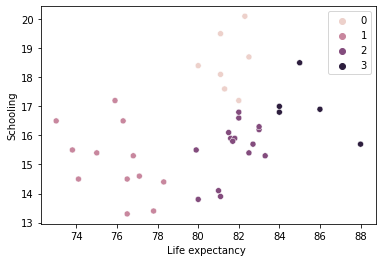

In [88]:
kmeans = KMeans(n_clusters = 4)
kmeans.fit(df_8[["Life expectancy ", "Schooling"]])
sns.scatterplot(data = df_8, x = "Life expectancy ", y = "Schooling", hue = kmeans.labels_)

In [89]:
df_ = df_8.copy()
df_['classificacao'] = kmeans.labels_
name_countries_classificated(df_, kmeans.labels_)

,0,1,2,3
0,Australia,Argentina,Belgium,Austria
1,Denmark,Bahrain,Canada,Finland
2,Iceland,Brunei Darussalam,Chile,Germany
3,Netherlands,Croatia,Cyprus,Greece
4,New Zealand,Estonia,France,Ireland
5,Norway,Hungary,Israel,NaN
6,Spain,Latvia,Italy,NaN
7,NaN,Lithuania,Japan,NaN
8,NaN,Poland,Luxembourg,NaN
9,NaN,Qatar,Malta,NaN


Há uma correlação fraca entre escolaridade e expectativa de vida

In [119]:
df_8[["Life expectancy ", "Schooling"]].corr()

,Life expectancy,Schooling
Life expectancy,1.000000,0.356389
Schooling,0.356389,1.000000


# Escolaridade e gastos pessoais com saúde

C:\Users\bergs\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


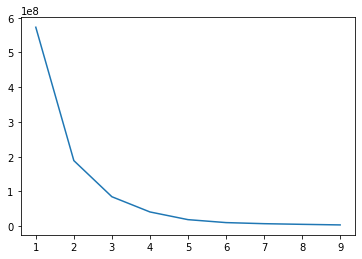

In [90]:
quantidade_k(df_8, "percentage expenditure", "Schooling")

<AxesSubplot:xlabel='percentage expenditure', ylabel='Schooling'>

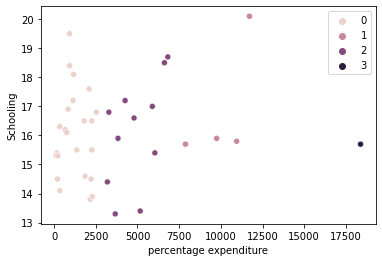

In [91]:
kmeans = KMeans(n_clusters = 4)
kmeans.fit(df_8[["percentage expenditure", "Schooling"]])
sns.scatterplot(data = df_8, x = "percentage expenditure", y = "Schooling", hue = kmeans.labels_)

In [92]:
df_ = df_8.copy()
df_['classificacao'] = kmeans.labels_
name_countries_classificated(df_, kmeans.labels_)

,0,1,2,3
0,Argentina,Australia,Brunei Darussalam,Switzerland
1,Bahrain,Austria,Finland,NaN
2,Belgium,Canada,Iceland,NaN
3,Chile,Sweden,Ireland,NaN
4,Croatia,NaN,Israel,NaN
5,Cyprus,NaN,Italy,NaN
6,Denmark,NaN,Qatar,NaN
7,Estonia,NaN,Singapore,NaN
8,France,NaN,Slovenia,NaN
9,Germany,NaN,Spain,NaN


Não há correlação entre a escolaridade e os gastos pessoais com saúde.

# Escolaridade e consumo de álcool

C:\Users\bergs\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


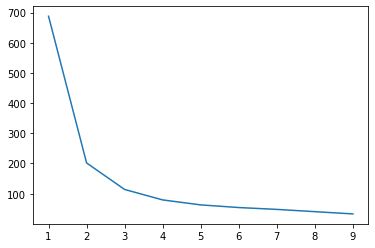

In [93]:
quantidade_k(df_alcool8, "Schooling", "Alcohol")

<AxesSubplot:xlabel='Alcohol', ylabel='Schooling'>

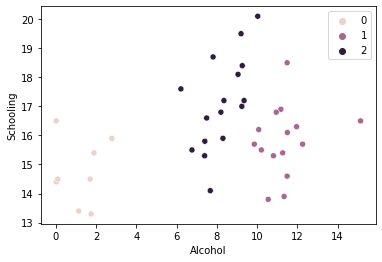

In [94]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(df_alcool8[["Schooling", "Alcohol"]])
sns.scatterplot(data = df_alcool8, x = "Alcohol", y = "Schooling", hue = kmeans.labels_)

In [95]:
df_ = df_alcool8.copy()
df_['classificacao'] = kmeans.labels_
name_countries_classificated(df_, kmeans.labels_)

,0,1,2
0,Bahrain,Austria,Argentina
1,Brunei Darussalam,Belgium,Australia
2,Estonia,Croatia,Canada
3,Israel,Cyprus,Chile
4,Qatar,France,Denmark
5,Saudi Arabia,Germany,Finland
6,Singapore,Hungary,Greece
7,United Arab Emirates,Ireland,Iceland
8,NaN,Latvia,Italy
9,NaN,Lithuania,Japan


Há uma correlação fraca entre consumo de álcool e escolaridade.

Índices de mortalidade infantil nesses países são extremamente baixos, tornando a análise irrelevante.

# Resultados

# Qual a relação existente entre consumo de álcool e expectativa de vida?

Países com IDH até 0.600: Muitos dos países que compõem esse grupo são muçulmanos e, por motivos religiosos, não consomem álcool. Não há uma correlação entre o consumo de álcool e a expectativa de vida.
Países com IDH entre 0.601 e 0.800: Não existe uma correlação entre a expectativa de vida e o consumo de álcool. Mais uma vez, há a presença de países onde não há consumo de álcool por questões religiosas.
Países com IDH acima de 0.800: Não há correlação entre consumo de álcool e expectativa de vida.
Conclusão: Não há correlação entre consumo de álcool e expectativa de vida.

# Países com maior escolaridade possuem maior expetativa de vida?

Países com IDH até 0.600: Não há relação entre a escolaridade e a expectativa de vida. Existem países com alta escolaridade e baixa expectativa de vida, e países com alta escolaridade e alta expectativa de vida.
Países com IDH entre 0.601 e 0.800: Nesse grupo de países, existe uma correlação fraca entre a escolaridade e a expectativa de vida.
Países com IDH acima de 0.800: Há uma correlação fraca entre escolaridade e expectativa de vida.
Conclusão: De um modo geral, existe uma correlação fraca entre escolaridade e expectativa de vida, mas não é algo revelante o suficiente para realmente influenciar na expectativa de vida de uma população.

É válido ressaltar que, analisando o gráfico sem separação por IDH, existe uma correlação positiva bastante aparente entre a escolaridade e a expectativa de vida. Isso se deve ao fato de que países com um maior nível de escolaridade também possuem um IDH mais elevado, e o IDH elevado resulta em uma maior expectativa de vida. É o principal fator relacionado a expectativa de vida nos dados analisados.

# Existe uma relação entre o PIB per capita e os gastos governamentais com saúde?

O PIB per capita de um país não influencia nos gastos governamentais com saúde. O gráfico sem separação por IDH deixa essa representação clara, conclusão que também foi alcançada nas análises separadas por IDH.

# Existe relação entre escolaridade e gastos pessoais com saúde?

Países com IDH até 0.600: Não existe uma correlação significante entre os gastos pessoais com saúde e a escolarização.
Países com IDH entre 0.601 e 0.800: Não existe correlação entre escolaridade e gastos pessoais com saúde.
Países com IDH acima de 0.800: Não há correlação entre a escolaridade e os gastos pessoais com saúde.
Conclusão: Não existe relação entre o nível de escolaridade e os gastos pessoais com saúde.

# Existe relação entre escolaridade e consumo de álcool?

Países com IDH até 0.600: Pelas questões religiosas já mencionadas, não é possível chegar a uma conclusão válida em um grupo de países como este.
Países com IDH entre 0.601 e 0.800: Existe uma correlação fraca entre a escolaridade e o consumo de álcool.
Países com IDH acima de 0.800: Há uma correlação fraca entre escolaridade e consumo de álcool.
Conclusão: Existe uma correlação fraca entre escolaridade e consumo de álcool presente em países que não são predominantemente muçulmanos.

# Apresentação:

Apresentar os histogramas de expectativa de vida e do IDH (em relação ao ano de 2012, os últimos histogramas feitos)